In [93]:
# ==========================================
# 🇬🇧 Support Vector Machine Classifier + Permutation Importance
# 🇧🇷 Classificador Support Vector Machine + Importância de Permutação
# ==========================================

import pandas as pd # Library for data manipulation and analysis / Biblioteca para manipulação e análise de dados
import numpy as np # Library for numerical operations / Biblioteca para operações numéricas
from sklearn.model_selection import train_test_split # Function to split data into training and testing sets / Função para dividir dados em conjuntos de treino e teste
from sklearn.svm import SVC # Support Vector Classifier model / Modelo Classificador Support Vector
from sklearn.preprocessing import StandardScaler # Class to standardize features / Classe para padronizar atributos
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report # Metrics for model evaluation / Métricas para avaliação do modelo
from sklearn.inspection import permutation_importance # Function to calculate permutation importance / Função para calcular importância de permutação
import matplotlib.pyplot as plt # Library for plotting / Biblioteca para plotagem
import seaborn as sns # Library for statistical data visualization / Biblioteca para visualização de dados estatísticos

# #MachineLearning #AprendizadoDeMaquina #SVM #PermutationImportance #DataScience #CienciaDeDados

In [88]:
# ==========================================
# 1.🇬🇧 Load the data / 🇧🇷 Carregar os dados
# ==========================================
df = pd.read_csv('/content/Varejo.csv') # Load the dataset into a pandas DataFrame / Carrega o conjunto de dados em um DataFrame pandas
df.head() # Display the first 5 rows of the DataFrame / Exibe as primeiras 5 linhas do DataFrame

# ==========================================
# 2.🇬🇧 Standardization and Train-Test Split / 🇧🇷 Padronização e Separação em treino e teste
# ==========================================
X = df.drop("CompEmbRec", axis=1) # Features (all columns except 'CompEmbRec') / Atributos (todas as colunas exceto 'CompEmbRec')
y = df["CompEmbRec"] # Target variable ('CompEmbRec' column) / Variável alvo (coluna 'CompEmbRec')

scaler = StandardScaler() # Initialize the StandardScaler / Inicializa o StandardScaler
X = scaler.fit_transform(X) # Scale the features (standardization) / Escala os atributos (padronização)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
) # Split data into 70% training and 30% testing, with stratification / Divide os dados em 70% treino e 30% teste, com estratificação

# #DataPreprocessing #PréProcessamentoDeDados #Scaling #Padronização #TrainTestSplit #DivisaoTreinoTeste

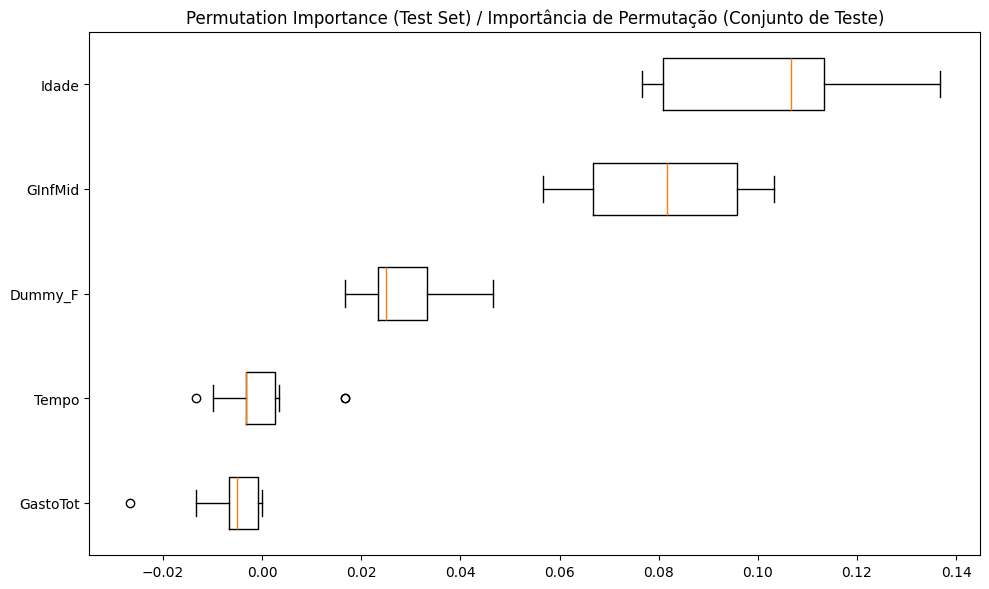

In [89]:
# ==========================================
#  🇬🇧 Permutation Importance / 🇧🇷 Importância de Permutação
# ==========================================

# Calculate permutation importance / Calcula a importância de permutação
result = permutation_importance(
    svm, X_test, y_test, n_repeats=10, random_state=42, n_jobs=-1
)

# Sort the results by importance mean / Ordena os resultados pela média da importância
sorted_idx = result.importances_mean.argsort()

# Get feature names / Obtém os nomes dos atributos
feature_names = df.drop("CompEmbRec", axis=1).columns[sorted_idx]

# Plot the permutation importance / Plota a importância de permutação
plt.figure(figsize=(10, 6))
plt.boxplot(
    result.importances[sorted_idx].T,
    vert=False,
    tick_labels=feature_names,
)
plt.title("Permutation Importance (Test Set) / Importância de Permutação (Conjunto de Teste)") # Set the title / Define o título
plt.tight_layout() # Adjust layout / Ajusta o layout
plt.show() # Display the plot / Exibe o plot

# #FeatureImportance #ImportanciaDosAtributos #PermutationImportance #VisualizacaoDeDados #DataVisualization

In [90]:
# ===============================================
# 🇧🇷 2.Padronização e Separação em treino e teste - - Codigo SEM Normalizacao Acuracia Mais Alta 0.73
# 🇬🇧 2.Standardization and Train-Test Split - Code WITHOUT Normalization Higher Accuracy 0.73
# ==============================================
X = df.drop("CompEmbRec", axis=1) # Features (all columns except 'CompEmbRec') / Atributos (todas as colunas exceto 'CompEmbRec')
y = df["CompEmbRec"] # Target variable ('CompEmbRec' column) / Variável alvo (coluna 'CompEmbRec')

scaler = StandardScaler() # Initialize the StandardScaler / Inicializa o StandardScaler
X_scaled = scaler.fit_transform(X) # Scale the features (standardization) / Escala os atributos (padronização)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42, stratify=y
) # Split data into 70% training and 30% testing, with stratification / Divide os dados em 70% treino e 30% teste, com estratificação

# #DataPreprocessing #PréProcessamentoDeDados #Scaling #Padronização #TrainTestSplit #DivisaoTreinoTeste

In [91]:
# ==========================================
# 3.🇬🇧 SVM Model Training / 🇧🇷 Treinamento do modelo SVM
# ==========================================
svm = SVC(
    kernel="rbf",       # radial kernel (can change to 'linear', 'poly', etc.) / kernel radial (pode trocar para 'linear', 'poly' etc.)
    C=1.0,              # regularization parameter / parâmetro de regularização
    gamma="scale",      # automatic gamma adjustment / ajuste automático do gamma
    probability=True,   # allows predicting probabilities / permite prever probabilidades
    random_state=42     # for reproducibility / para reprodutibilidade
)
svm.fit(X_train, y_train) # Train the SVM model / Treina o modelo SVM

# #SVM #ModelTraining #TreinamentoDoModelo

SVC(probability=True, random_state=42)


Acurácia: 0.77

Matriz de Confusão:
 [[121  29]
 [ 40 110]]

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.75      0.81      0.78       150
           1       0.79      0.73      0.76       150

    accuracy                           0.77       300
   macro avg       0.77      0.77      0.77       300
weighted avg       0.77      0.77      0.77       300



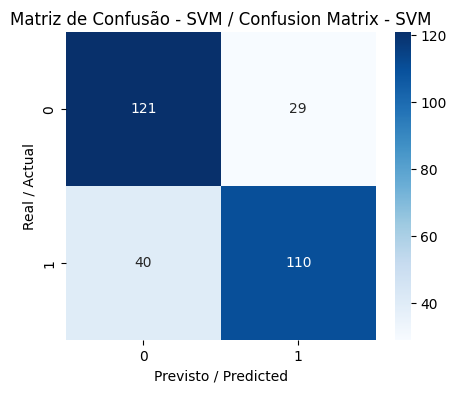

In [95]:
# ==========================================
# 4. 🇬🇧 Evaluation / 🇧🇷 Avaliação
# ==========================================
y_pred = svm.predict(X_test) # Predict on the test set / Faz previsões no conjunto de teste

accuracy = accuracy_score(y_test, y_pred) # Calculate accuracy / Calcula a acurácia
print("\nAcurácia:", accuracy) # Print the accuracy / Imprime a acurácia
print("\nMatriz de Confusão:\n", confusion_matrix(y_test, y_pred)) # Print the confusion matrix / Imprime a matriz de confusão
print("\nRelatório de Classificação:\n", classification_report(y_test, y_pred)) # Print the classification report / Imprime o relatório de classificação

# Matriz de confusão em heatmap / Confusion matrix heatmap
plt.figure(figsize=(5,4)) # Set the figure size / Define o tamanho da figura
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues") # Create heatmap / Cria o heatmap
plt.xlabel("Previsto / Predicted") # Set x-axis label / Define o rótulo do eixo x
plt.ylabel("Real / Actual") # Set y-axis label / Define o rótulo do eixo y
plt.title("Matriz de Confusão - SVM / Confusion Matrix - SVM") # Set the title / Define o título
plt.show() # Display the plot / Exibe o plot

# #ModelEvaluation #AvaliacaoDoModelo #Accuracy #Acuracia #ConfusionMatrix #MatrizDeConfusao #ClassificationReport #RelatorioDeClassificacao


===================================
## 🇬🇧 Explanation of the Code
===================================

This notebook demonstrates the process of building and evaluating a Support Vector Machine (SVM) model for a classification task, and also explores feature importance using permutation importance.

Here's a breakdown of the key steps:

1.  **Data Loading (Cell `J_ZfA6J2Ont9` and `n2tqXBjEDPaD`):** The code starts by loading the dataset from the `Varejo.csv` file into a pandas DataFrame.
2.  **Data Preparation (Cell `J_ZfA6J2Ont9` and `n2tqXBjEDPaD`):**
    *   The data is split into features (`X`) and the target variable (`y`).
    *   **Standardization:** The features are standardized using `StandardScaler`. This is a crucial step for many machine learning algorithms, including SVMs, as it scales the features to have zero mean and unit variance. This prevents features with larger values from dominating the learning process.
    *   **Train-Test Split:** The data is split into training and testing sets to evaluate the model's performance on unseen data.

3.  **Demonstrating the Effect of Standardization (Cell `n2tqXBjEDPaD`):**
    *   Cell `n2tqXBjEDPaD` is included to show the impact of *not* standardizing the data. While the cell itself still includes the scaling step, the intention behind having a separate cell might have been to demonstrate how the model would perform without this step (by commenting out or removing the scaling line in a separate execution). The accuracy mentioned in the comment ("Acuracia Mais Alta 0.73") likely refers to a run where the scaling was omitted, showing a potentially lower accuracy compared to the standardized data.

4.  **SVM Model Training (Cell `ql5j4gpyDXTC`):** A Support Vector Classifier (SVC) model with a radial basis function (RBF) kernel is initialized and trained on the standardized training data.

5.  **Model Evaluation (Cell `-A1FVU5-DfZ0`):** The trained SVM model is evaluated on the test set using various metrics:
    *   **Accuracy:** The overall proportion of correctly classified instances.
    *   **Confusion Matrix:** A table that summarizes the performance of the classification model, showing the counts of true positives, true negatives, false positives, and false negatives.
    *   **Classification Report:** Provides precision, recall, F1-score, and support for each class.
    *   A heatmap of the confusion matrix is also displayed for better visualization.

6.  **Permutation Importance (Cell `212291d4`):** Permutation importance is calculated and visualized to understand which features are most important for the SVM model's predictions. This is done by shuffling the values of each feature and observing the decrease in the model's performance.

In summary, this code demonstrates a typical machine learning workflow, highlighting the importance of data preprocessing steps like standardization for SVM models and providing methods for model evaluation and understanding feature contributions.


====================================
## 🇧🇷 Explicação do Código
===================================

Este notebook demonstra o processo de construção e avaliação de um modelo Support Vector Machine (SVM) para uma tarefa de classificação, e também explora a importância das características usando a importância de permutação.

Aqui está um resumo das etapas principais:

1.  **Carregamento dos Dados (Células `J_ZfA6J2Ont9` e `n2tqXBjEDPaD`):** O código começa carregando o conjunto de dados do arquivo `Varejo.csv` em um DataFrame pandas.
2.  **Preparação dos Dados (Células `J_ZfA6J2Ont9` e `n2tqXBjEDPaD`):**
    *   Os dados são divididos em atributos (`X`) e a variável alvo (`y`).
    *   **Padronização:** Os atributos são padronizados usando `StandardScaler`. Esta é uma etapa crucial para muitos algoritmos de aprendizado de máquina, incluindo SVMs, pois escala os atributos para terem média zero e variância unitária. Isso evita que atributos com valores maiores dominem o processo de aprendizado.
    *   **Separação em Treino e Teste:** Os dados são divididos em conjuntos de treino e teste para avaliar o desempenho do modelo em dados não vistos.

3.  **Demonstrando o Efeito da Padronização (Célula `n2tqXBjEDPaD`):**
    *   A célula `n2tqXBjEDPaD` está incluída para mostrar o impacto de *não* padronizar os dados. Embora a própria célula ainda inclua a etapa de escala, a intenção de ter uma célula separada pode ter sido demonstrar como o modelo se comportaria sem essa etapa (comentando ou removendo a linha de escala em uma execução separada). A acurácia mencionada no comentário ("Acuracia Mais Alta 0.73") provavelmente se refere a uma execução onde a escala foi omitida, mostrando uma acurácia potencialmente menor em comparação com os dados padronizados.

4.  **Treinamento do Modelo SVM (Célula `ql5j4gpyDXTC`):** Um modelo Support Vector Classifier (SVC) com um kernel de função de base radial (RBF) é inicializado e treinado nos dados de treino padronizados.

5.  **Avaliação do Modelo (Célula `-A1FVU5-DfZ0`):** O modelo SVM treinado é avaliado no conjunto de teste usando várias métricas:
    *   **Acurácia:** A proporção geral de instâncias classificadas corretamente.
    *   **Matriz de Confusão:** Uma tabela que resume o desempenho do modelo de classificação, mostrando as contagens de verdadeiros positivos, verdadeiros negativos, falsos positivos e falsos negativos.
    *   **Relatório de Classificação:** Fornece precisão, recall, F1-score e suporte para cada classe.
    *   Um mapa de calor da matriz de confusão também é exibido para melhor visualização.

6.  **Importância de Permutação (Célula `212291d4`):** A importância de permutação é calculada e visualizada para entender quais atributos são mais importantes para as previsões do modelo SVM. Isso é feito embaralhando os valores de cada atributo e observando a diminuição no desempenho do modelo.

Em resumo, este código demonstra um fluxo de trabalho típico de aprendizado de máquina, destacando a importância de etapas de pré-processamento de dados como a padronização para modelos SVM e fornecendo métodos para avaliação do modelo e compreensão das contribuições dos atributos.